Rotation Strategy
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

In [7]:
loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2007, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'EFA', 'GLD']

In [8]:
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import NoOptimizer, RotationStrategy
from mypo.rebalancer import MonthlyRebalancer
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 3416/3416 [00:45<00:00, 75.34it/s]


                tickers  yearly total return  max draw down  \
0  [QQQ, GLD, TLT, SPY]             1.084972       0.461446   

   max draw down span  
0                1237  


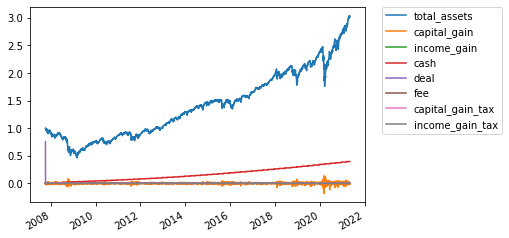

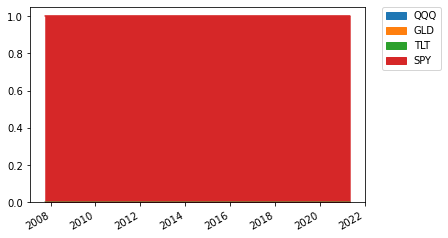

In [5]:
optimizer = NoOptimizer([1, 0, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy
----------------------------------------

100%|██████████| 3416/3416 [00:39<00:00, 86.22it/s]


           tickers  yearly total return  max draw down  max draw down span
0  [GLD, EFA, SPY]             1.028369       0.468413                1453


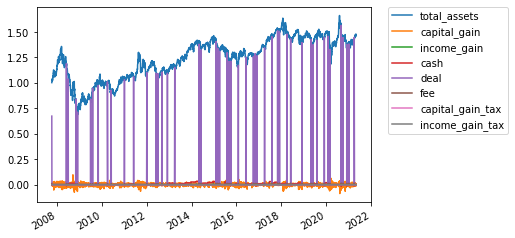

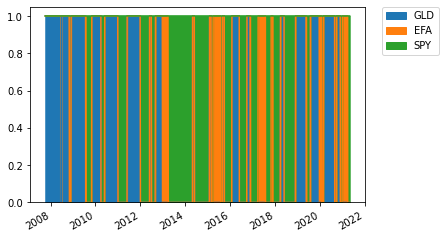

In [9]:
optimizer = RotationStrategy(risk_free_rate=0.02)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
